In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV load karo
df = pd.read_csv(r"C:\Users\hp\Desktop\vender_prafomiss\vendor_sales_summary.csv")
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.shape


(10692, 18)

In [5]:

df.columns


Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')

In [6]:

df.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
GrossProfit              0
ProfitMargin             0
StockTurnover            0
SalesToPurchaseRatio     0
dtype: int64

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
GrossProfit              float64
ProfitMargin             float64
StockTurnover            float64
SalesToPurchaseRatio     float64
dtype: object

In [10]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

In [9]:
df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
df['FreightPerUnit'] = df['FreightCost'] / df['TotalSalesQuantity']
df['SalesToPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']

# Q1: Top 5 Vendors by Total Sales

In [13]:
top5_sales = df.sort_values(by='TotalSalesDollars', ascending=False).head(5)
top5_sales[['VendorName', 'TotalSalesDollars']]

,VendorName,TotalSalesDollars
0,BROWN-FORMAN CORP,5.101920e+06
1,MARTIGNETTI COMPANIES,4.819073e+06
2,PERNOD RICARD USA,4.538121e+06
3,DIAGEO NORTH AMERICA INC,4.475973e+06
4,DIAGEO NORTH AMERICA INC,4.223108e+06


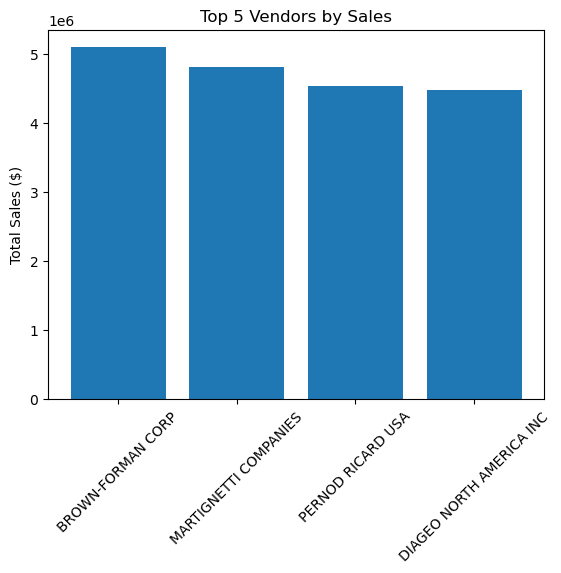

In [14]:
import matplotlib.pyplot as plt

plt.bar(top5_sales['VendorName'], top5_sales['TotalSalesDollars'])
plt.title("Top 5 Vendors by Sales")
plt.xticks(rotation=45)
plt.ylabel("Total Sales ($)")
plt.show()

# Q2: Vendors with Negative Profit Margin

In [15]:
negative_margin = df[df['ProfitMargin'] < 0]
negative_margin[['VendorName', 'TotalSalesDollars', 'TotalPurchaseDollars', 'ProfitMargin']].head(10)

,VendorName,TotalSalesDollars,TotalPurchaseDollars,ProfitMargin
304,DIAGEO NORTH AMERICA INC,176577.85,185784.10,-5.213706
331,DIAGEO NORTH AMERICA INC,164084.34,173952.98,-6.014370
437,MARTIGNETTI COMPANIES,119616.75,138369.42,-15.677294
464,MHW LTD,130097.76,131392.96,-0.995559
550,DIAGEO NORTH AMERICA INC,113966.29,115711.52,-1.531356
578,MHW LTD,95499.46,112111.52,-17.394926
606,DIAGEO NORTH AMERICA INC,100067.22,106105.50,-6.034224
692,FABRIZIA SPIRITS LLC,94406.84,96915.17,-2.656937
718,BROWN-FORMAN CORP,89296.41,93830.40,-5.077461
836,REMY COINTREAU USA INC,72486.63,82075.29,-13.228177


In [16]:
print("Total vendors with negative margin:", negative_margin.shape[0])

Total vendors with negative margin: 2127


In [18]:
df = df[df['TotalSalesDollars'] > 0]  # Prevent divide by zero
df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
negative_margin = df[df['ProfitMargin'] < 0]

C:\Users\hp\AppData\Local\Temp\ipykernel_5140\228937201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100


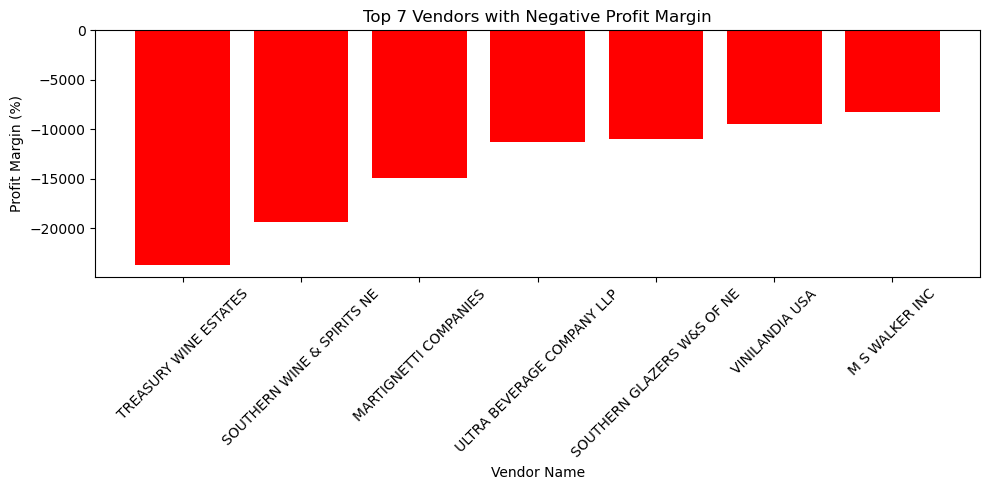

In [20]:
negative_margin_sorted = negative_margin.sort_values(by='ProfitMargin').head(10)

plt.figure(figsize=(10,5))
plt.bar(negative_margin_sorted['VendorName'], negative_margin_sorted['ProfitMargin'], color='red')
plt.title("Top 7 Vendors with Negative Profit Margin")
plt.xlabel("Vendor Name")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q3: Vendors with Highest Freight Per Unit

In [22]:
df['FreightPerUnit'] = df['FreightCost'] / df['TotalSalesQuantity']
df = df[df['TotalSalesQuantity'] > 0] 

C:\Users\hp\AppData\Local\Temp\ipykernel_5140\620049217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FreightPerUnit'] = df['FreightCost'] / df['TotalSalesQuantity']


In [23]:
top_freight = df.sort_values(by='FreightPerUnit', ascending=False).head(10)
top_freight[['VendorName', 'FreightCost', 'TotalSalesQuantity', 'FreightPerUnit']]

,VendorName,FreightCost,TotalSalesQuantity,FreightPerUnit
3695,DIAGEO NORTH AMERICA INC,257032.07,1.0,257032.07
5178,DIAGEO NORTH AMERICA INC,257032.07,1.0,257032.07
2840,DIAGEO NORTH AMERICA INC,257032.07,1.0,257032.07
10644,DIAGEO NORTH AMERICA INC,257032.07,1.0,257032.07
10514,DIAGEO NORTH AMERICA INC,257032.07,1.0,257032.07
4758,MARTIGNETTI COMPANIES,144929.24,1.0,144929.24
10631,MARTIGNETTI COMPANIES,144929.24,1.0,144929.24
7140,MARTIGNETTI COMPANIES,144929.24,1.0,144929.24
10671,MARTIGNETTI COMPANIES,144929.24,1.0,144929.24
10665,MARTIGNETTI COMPANIES,144929.24,1.0,144929.24


# Q4: Total Purchase Quantity vs. Total Sales Quantity

In [28]:
correlation = df['TotalPurchaseQuantity'].corr(df['TotalSalesQuantity'])
print("Correlation between Purchase & Sales Quantity:", round(correlation, 3))

Correlation between Purchase & Sales Quantity: 0.999


# Q5: Vendors with Stock Turnover < 1 (Slow-Moving Stock)

In [29]:
slow_movers = df[df['StockTurnover'] < 1]
slow_movers[['VendorName', 'StockTurnover']].sort_values(by='StockTurnover').head(10)

,VendorName,StockTurnover
3981,TREASURY WINE ESTATES,0.002817
2147,SOUTHERN WINE & SPIRITS NE,0.003333
5213,MARTIGNETTI COMPANIES,0.004386
2462,ULTRA BEVERAGE COMPANY LLP,0.005747
5200,SOUTHERN GLAZERS W&S OF NE,0.005952
6486,VINILANDIA USA,0.006849
4654,MARTIGNETTI COMPANIES,0.008333
4758,MARTIGNETTI COMPANIES,0.008333
3676,M S WALKER INC,0.008772
6492,SOUTHERN WINE & SPIRITS NE,0.015152


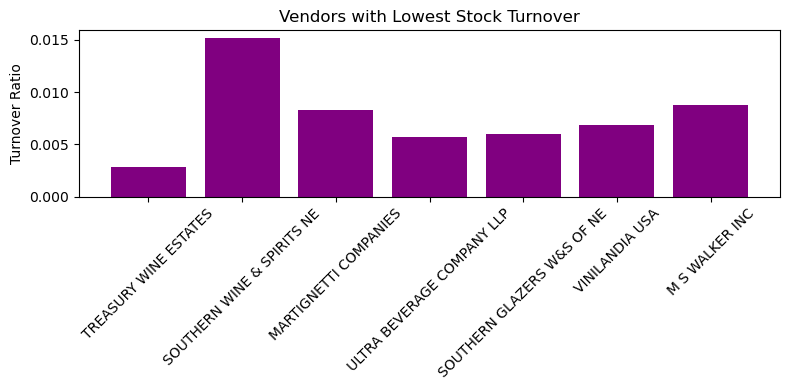

In [30]:
top_slow = slow_movers.sort_values(by='StockTurnover').head(10)
plt.figure(figsize=(8,4))
plt.bar(top_slow['VendorName'], top_slow['StockTurnover'], color='purple')
plt.title("Vendors with Lowest Stock Turnover")
plt.xticks(rotation=45)
plt.ylabel("Turnover Ratio")
plt.tight_layout()
plt.show()

In [33]:

import sqlite3

df = pd.read_csv(r"C:\Users\hp\Desktop\vender_prafomiss\vendor_sales_summary.csv")
conn = sqlite3.connect("vendor.db")
df.to_sql("vendor_summary", conn, if_exists="replace", index=False)

10692

In [34]:
def run_sql(query):
    return pd.read_sql_query(query, conn)

# Q6 : Total Unsold Inventory Value

In [36]:
run_sql("""
SELECT SUM((TotalPurchaseQuantity - TotalSalesQuantity) * PurchasePrice) AS UnsoldValue
FROM vendor_summary;
""")

,UnsoldValue
0,8748929.54


# Q7: Top 5 Brands by Sales to Purchase Ratio

In [37]:
run_sql("""
SELECT Brand, SalesToPurchaseRatio
FROM vendor_summary
ORDER BY SalesToPurchaseRatio DESC
LIMIT 5;
""")

,Brand,SalesToPurchaseRatio
0,4703,352.928571
1,11209,252.994305
2,5831,223.837079
3,3406,219.705009
4,5335,214.696533


# 8  Average Profit Margin by Brand (Top 5)

In [38]:
run_sql("""
SELECT Brand, AVG(ProfitMargin) AS AvgMargin
FROM vendor_summary
GROUP BY Brand
ORDER BY AvgMargin DESC
LIMIT 5;
""")

,Brand,AvgMargin
0,4703,99.716657
1,11209,99.604734
2,5831,99.553246
3,3406,99.544844
4,5335,99.534226


# Q9: Vendor Contribution to Total Sales (Top 5)

In [39]:
run_sql("""
SELECT VendorName, TotalSalesDollars
FROM vendor_summary
ORDER BY TotalSalesDollars DESC
LIMIT 5;
""")

,VendorName,TotalSalesDollars
0,BROWN-FORMAN CORP,5.101920e+06
1,MARTIGNETTI COMPANIES,4.819073e+06
2,PERNOD RICARD USA,4.538121e+06
3,DIAGEO NORTH AMERICA INC,4.475973e+06
4,DIAGEO NORTH AMERICA INC,4.223108e+06


# Q10: Vendors with High Margin but Low Sales

In [40]:
run_sql("""
SELECT VendorName, ProfitMargin, TotalSalesDollars
FROM vendor_summary
WHERE ProfitMargin > 30 AND TotalSalesDollars < 10000;
""")

,VendorName,ProfitMargin,TotalSalesDollars
0,PERFECTA WINES,31.256885,9867.65
1,MARTIGNETTI COMPANIES,30.071035,9643.10
2,STATE WINE & SPIRITS,32.283460,9854.52
3,HEAVEN HILL DISTILLERIES,31.120702,9612.99
4,MCCORMICK DISTILLING CO,31.909199,9698.52
...,...,...,...
3067,DIAGEO NORTH AMERICA INC,89.806174,27.86
3068,WINE GROUP INC,83.448276,15.95
3069,SAZERAC CO INC,96.436186,65.66
3070,DIAGEO NORTH AMERICA INC,98.974037,143.28


# Q11: Vendors with More Purchases but Zero Sales

In [43]:
run_sql("""
SELECT VendorName, TotalPurchaseQuantity, TotalSalesQuantity
FROM vendor_summary
WHERE TotalSalesQuantity = 0 AND TotalPurchaseQuantity > 0
ORDER BY TotalPurchaseQuantity DESC;
""")


,VendorName,TotalPurchaseQuantity,TotalSalesQuantity
0,ULTRA BEVERAGE COMPANY LLP,1140,0.0
1,ULTRA BEVERAGE COMPANY LLP,1044,0.0
2,DELICATO VINEYARDS INC,1032,0.0
3,STATE WINE & SPIRITS,1017,0.0
4,M S WALKER INC,1008,0.0
...,...,...,...
173,M S WALKER INC,1,0.0
174,MILTONS DISTRIBUTING CO,1,0.0
175,DIAGEO NORTH AMERICA INC,1,0.0
176,WINE GROUP INC,1,0.0


# Q12: Top 5 Brands by Gross Profit

In [44]:
run_sql("""
SELECT Brand, SUM(GrossProfit) AS TotalGrossProfit
FROM vendor_summary
GROUP BY Brand
ORDER BY TotalGrossProfit DESC
LIMIT 5;
""")

,Brand,TotalGrossProfit
0,1233,1290667.91
1,4261,1214774.94
2,3545,1199901.61
3,8068,1119816.92
4,3405,1015032.27


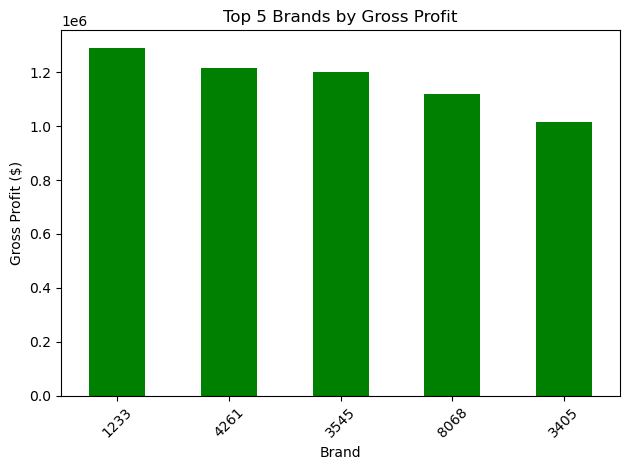

In [45]:
top_brands = run_sql("""
SELECT Brand, SUM(GrossProfit) AS TotalGrossProfit
FROM vendor_summary
GROUP BY Brand
ORDER BY TotalGrossProfit DESC
LIMIT 5;
""")

top_brands.plot(kind='bar', x='Brand', y='TotalGrossProfit', legend=False, color='green')
plt.title("Top 5 Brands by Gross Profit")
plt.ylabel("Gross Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()